Find a package/library to perform PLSR on the AutoMPG dataset. Take 300 cars “randomly” to build the model and the rest of 92 cars to test.

a. (5%) Start with a single 𝑦 (=mpg). What do you observe with the testing results?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/homework_6/auto-mpg.csv', sep=";", header=None, names=['Mpg', 'Cylinders', 'Displacement' ,'Horsepower', 'Weight', 'Acceleration', 'Model year', 'Origin', 'Car name'])


df.head()

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,Origin,Car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [15]:
# X and y
X = df [['Cylinders', 'Displacement' ,'Horsepower', 'Weight', 'Acceleration', 'Model year', 'Origin']]
y = df[['Mpg']]
len(y)

392

/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:93: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:325: RuntimeWarning: invalid value encountered in true_divide
  x_loadings = np.dot(x_scores, Xk) / np.dot(x_scores, x_scores)
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:334: RuntimeWarning: invalid value encountered in true_divide
  y_loadings = np.dot(x_scores, Yk) / np.dot(x_scores, x_scores)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  Fi

Text(0.5, 1.0, 'Mpg')

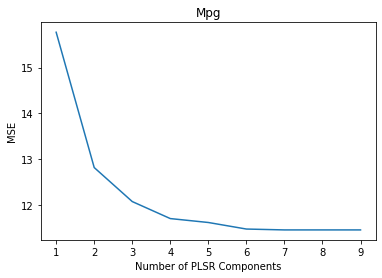

In [16]:
#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = len(X)

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 10):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLSR Components')
plt.ylabel('MSE')
plt.title('Mpg')

In [17]:
test = (92*100)/len(y)
print(test)

23.46938775510204


In [21]:
test = len(y)*92/100
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.24,random_state=0) 

#calculate RMSE
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

print("RMSE", np.sqrt(mean_squared_error(y_test, pls.predict(scale(X_test)))))


maxElement = np.amax(y_test)
print(maxElement) 
minElement = np.amin(y_test)
print(minElement) 




RMSE 3.4773871607726172
Mpg    44.6
dtype: float64
Mpg    10.0
dtype: float64


Observations: looking at the MSE plot we should pick how many factor it might be good for our algorithm. The Root-mean-square deviation is not a big number if we compared the range of MPG - [10,44.6].


b. (10%) Use 𝑦 = [mpg model year]. What do you observe with the testing results? In particular, compare
and discuss the testing results of the mpg between (a) and (b).

In [22]:
# X and y
X = df [['Cylinders', 'Displacement' ,'Horsepower', 'Weight', 'Acceleration', 'Origin']]
y = df[['Mpg', 'Model year']]


/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:93: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:107: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3

Text(0.5, 1.0, 'Mpg - Model year')

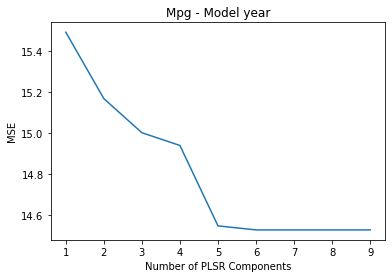

In [23]:
#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = len(X)

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 10):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLSR Components')
plt.ylabel('MSE')
plt.title('Mpg - Model year')

In [25]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.24,random_state=0) 

#calculate RMSE
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

print("RMSE", np.sqrt(mean_squared_error(y_test, pls.predict(scale(X_test)))))

maxElement = np.amax(y_test)
print(maxElement) 
minElement = np.amin(y_test)
print(minElement) 


3.8771432670169754
Mpg           44.6
Model year    82.0
dtype: float64
Mpg           10.0
Model year    70.0
dtype: float64


Using Model Year as an output feature (Y), we increase the MSE. In other words, we need more component to describe the model, however is not a drasticly change. 

Moreover, the RMSE didn't change that much adding another component as output.  
